# Loan Approval Prediction

## In this project, we aim to build a machine-learning model that predicts whether a loan application will be approved or not. 
## Loan approval prediction is important for banks and financial institutions because it helps them reduce risk, prevent losses, and make faster decisions.

## Why Loan Approval Prediction?
### Financial institutions like **banks**, **NBFCs**, and **online lenders** receive thousands of loan applications.  
### Manually checking each file is slow and error-prone.  
### A predictive ML model helps:
### - Reduce loan approval time  
### - Identify risky applicants early  
### - Improve decision-making  
### - Reduce bad debts  


## IMPORTING ALL REQUIRED LIBRARIES

In [1]:
import pandas as pd                               # Data loading & manipulation
import numpy as np                                # Numerical operations

import matplotlib.pyplot as plt                   # Plotting
import seaborn as sns                             # Visualizations

from sklearn.preprocessing import LabelEncoder     # Encoding categorical columns
from sklearn.preprocessing import StandardScaler   # Scaling numeric features

from sklearn.model_selection import train_test_split   # Train-test split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.ensemble import RandomForestClassifier    # ML model

from imblearn.over_sampling import SMOTE              # Handle imbalanced data

# ML Model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings('ignore')                     # Ignore warnings

### Load dataset

In [2]:
df = pd.read_csv("Loan_Dataset.csv")

In [3]:
df.head()

,Applicant_ID,Gender,Age,Marital_Status,Dependents,Education,Employment_Status,Occupation_Type,Residential_Status,City/Town,...,Loan_Amount_Requested,Loan_Term,Loan_Purpose,Interest_Rate,Loan_Type,Co-Applicant,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
0,1,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,2,Male,36,Married,2,High School,Employed,Business,Own,Suburban,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,3,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,4,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,5,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1


In [4]:
df.shape       #Confirms dataset size (rows & columns).

(52000, 27)

In [5]:
df.columns    # Helps us see available features.

Index(['Applicant_ID', 'Gender', 'Age', 'Marital_Status', 'Dependents',
       'Education', 'Employment_Status', 'Occupation_Type',
       'Residential_Status', 'City/Town', 'Annual_Income', 'Monthly_Expenses',
       'Credit_Score', 'Existing_Loans', 'Total_Existing_Loan_Amount',
       'Outstanding_Debt', 'Loan_History', 'Loan_Amount_Requested',
       'Loan_Term', 'Loan_Purpose', 'Interest_Rate', 'Loan_Type',
       'Co-Applicant', 'Bank_Account_History', 'Transaction_Frequency',
       'Default_Risk', 'Loan_Approval_Status'],
      dtype='object')

In [6]:
df.dtypes     # Tells which columns are numeric/categorical.

Applicant_ID                    int64
Gender                         object
Age                             int64
Marital_Status                 object
Dependents                      int64
Education                      object
Employment_Status              object
Occupation_Type                object
Residential_Status             object
City/Town                      object
Annual_Income                   int64
Monthly_Expenses                int64
Credit_Score                    int64
Existing_Loans                  int64
Total_Existing_Loan_Amount      int64
Outstanding_Debt                int64
Loan_History                    int64
Loan_Amount_Requested           int64
Loan_Term                       int64
Loan_Purpose                   object
Interest_Rate                 float64
Loan_Type                      object
Co-Applicant                   object
Bank_Account_History            int64
Transaction_Frequency           int64
Default_Risk                  float64
Loan_Approva

In [7]:
df.info()     # Helps detect missing values & memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Applicant_ID                52000 non-null  int64  
 1   Gender                      52000 non-null  object 
 2   Age                         52000 non-null  int64  
 3   Marital_Status              52000 non-null  object 
 4   Dependents                  52000 non-null  int64  
 5   Education                   52000 non-null  object 
 6   Employment_Status           52000 non-null  object 
 7   Occupation_Type             52000 non-null  object 
 8   Residential_Status          52000 non-null  object 
 9   City/Town                   52000 non-null  object 
 10  Annual_Income               52000 non-null  int64  
 11  Monthly_Expenses            52000 non-null  int64  
 12  Credit_Score                52000 non-null  int64  
 13  Existing_Loans              520

## Handle Missing Values

In [8]:
df.isnull().sum()    #Check how many missing values are present in each column

Applicant_ID                  0
Gender                        0
Age                           0
Marital_Status                0
Dependents                    0
Education                     0
Employment_Status             0
Occupation_Type               0
Residential_Status            0
City/Town                     0
Annual_Income                 0
Monthly_Expenses              0
Credit_Score                  0
Existing_Loans                0
Total_Existing_Loan_Amount    0
Outstanding_Debt              0
Loan_History                  0
Loan_Amount_Requested         0
Loan_Term                     0
Loan_Purpose                  0
Interest_Rate                 0
Loan_Type                     0
Co-Applicant                  0
Bank_Account_History          0
Transaction_Frequency         0
Default_Risk                  0
Loan_Approval_Status          0
dtype: int64

In [9]:
df = df.dropna(subset=['Loan_Approval_Status'])   #Target cannot be missing

## Fill numeric missing values with median

In [10]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].median())   #Median is robust to outliers

## Fill categorical missing values with mode

In [11]:
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])  #Mode = most frequent category


# Interpretation
### First we checked all missing values.

### Then we removed rows where the target (Loan Approval) was missing because the model cannot train without target.

### For numeric columns, we filled missing values with the median, which is good when outliers exist.

### For categorical columns, we filled missing values with the most frequent category (mode).

### Finally rechecked to confirm no missing values remain.

In [12]:
df.duplicated().sum()       # → tells the count of duplicate rows

np.int64(0)

# Exploratory Data Analysis (EDA Visuals & Insights)

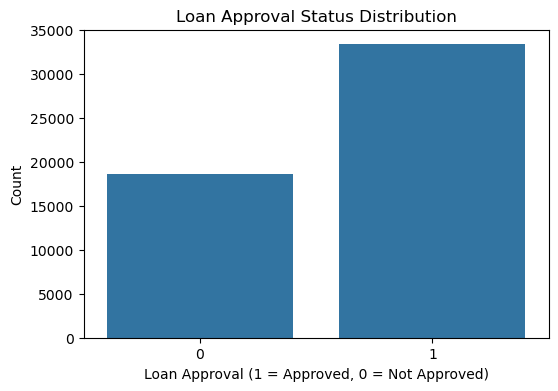

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Loan_Approval_Status')
plt.title("Loan Approval Status Distribution")
plt.xlabel("Loan Approval (1 = Approved, 0 = Not Approved)")
plt.ylabel("Count")
plt.show()

# NOTE:
# This shows how many customers are approved vs not approved.
# We check if dataset is balanced or imbalanced.

In [14]:
# Count of Approved vs Not Approved
approval_counts = df["Loan_Approval_Status"].value_counts()

print("Count of Approved (1) and Not Approved (0):")
print(approval_counts)

# NOTE:
# value_counts() → counts how many times each category appears.
# Here:
# 1 = Approved loans
# 0 = Not Approved loans

Count of Approved (1) and Not Approved (0):
Loan_Approval_Status
1    33366
0    18634
Name: count, dtype: int64


In [15]:
approval_percent = df["Loan_Approval_Status"].value_counts(normalize=True) * 100

print("\nPercentage of Approval Status:")
print(approval_percent)


Percentage of Approval Status:
Loan_Approval_Status
1    64.165385
0    35.834615
Name: proportion, dtype: float64


## Numerical Feature Distribution

### Education Distribution

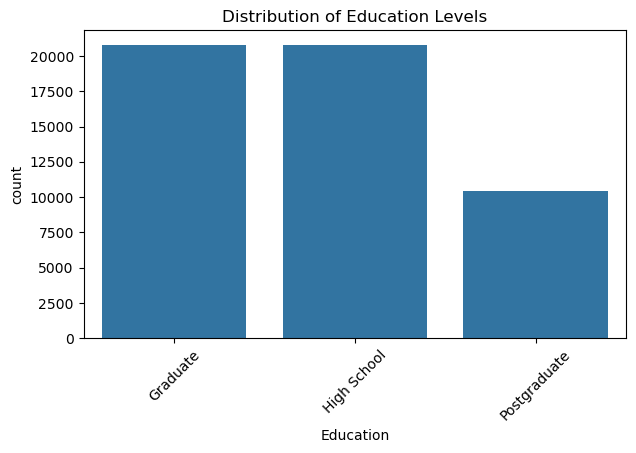

In [16]:
plt.figure(figsize=(7,4))              # set chart size
sns.countplot(data=df, x="Education")  # bar chart of education categories
plt.title("Distribution of Education Levels")  # title
plt.xticks(rotation=45)                # rotate labels for clarity
plt.show()                             # show graph

## Interpretation

### This chart shows how applicants are distributed across education levels.
### It helps us see whether the dataset has more graduates, postgraduates, high-school candidates, etc.
### Knowing this helps understand customer profile patterns.

### Employment Status Distribution

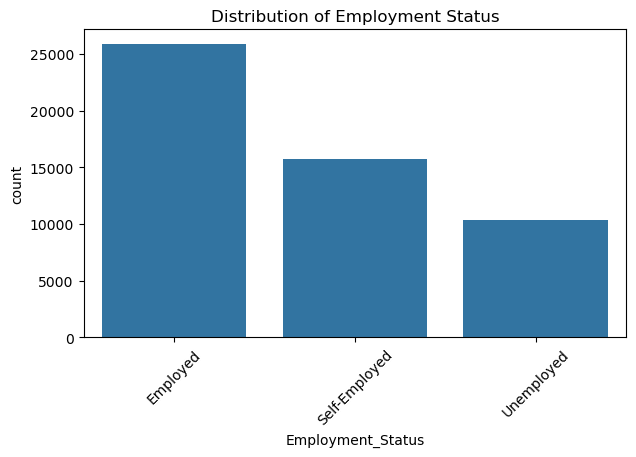

In [17]:
plt.figure(figsize=(7,4))                        # set chart size
sns.countplot(data=df, x="Employment_Status")     # plot count of employment types
plt.title("Distribution of Employment Status")    # chart title
plt.xticks(rotation=45)                           # rotate labels for readability
plt.show()                                        # show the plot

## Interpretation

### This chart shows how many applicants belong to each employment category (Employed, Self-Employed, Unemployed, etc.).
### It helps us understand whether the dataset is dominated by one type of employment or evenly distributed.

### Distribution of Marital Status

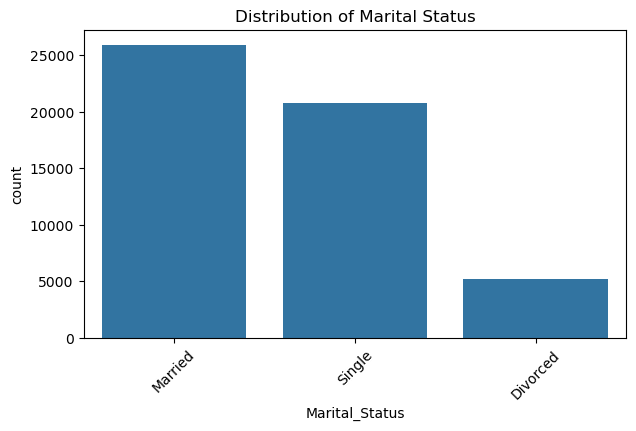

In [18]:
plt.figure(figsize=(7,4))                   # set chart size
sns.countplot(data=df, x="Marital_Status")  # plot count of each marital category
plt.title("Distribution of Marital Status") # chart title
plt.xticks(rotation=45)                     # rotate labels for readability
plt.show()                                  # display plot

## INTERPRETATION
### This chart shows which marital status category is most common in our loan applicants.
### It helps us understand if married or single applicants dominate the dataset.
### Useful later when checking if marital status affects loan approval.

### Dependents Distribution

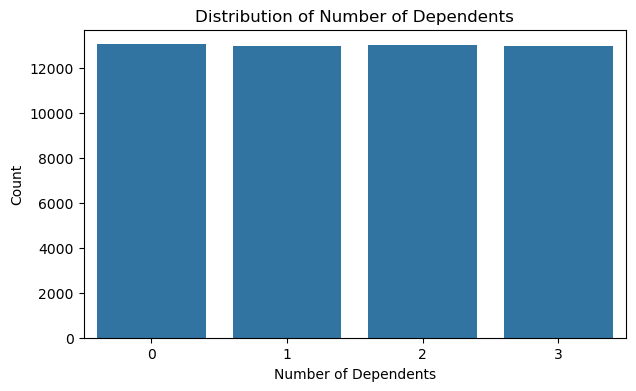

In [19]:
plt.figure(figsize=(7,4))   # set figure size
sns.countplot(data=df, x="Dependents")   # countplot for number of dependents
plt.title("Distribution of Number of Dependents")  # title
plt.xlabel("Number of Dependents")  
plt.ylabel("Count")
plt.show()    # display the plot

## Interpretation
### This chart shows how many applicants have 0, 1, 2, 3 or more dependents.
### We can observe which dependent category is most common. 
### This helps understand the financial responsibility level of the customers.
### Higher dependents often means higher financial burden → may affect loan approval.

### City/Town Distribution

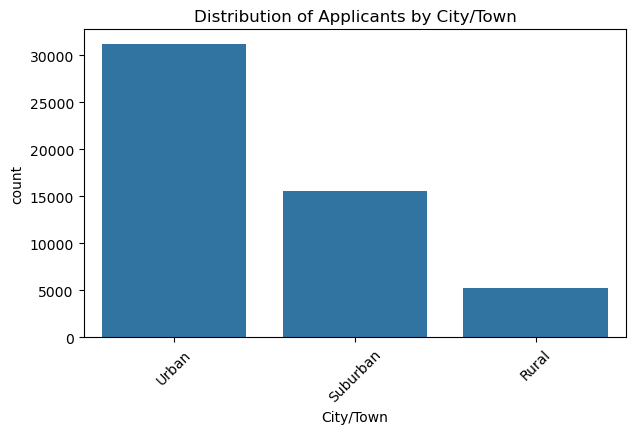

In [20]:
plt.figure(figsize=(7,4))   # chart size
sns.countplot(data=df, x="City/Town")   # plot counts of each city category
plt.title("Distribution of Applicants by City/Town")  # title
plt.xticks(rotation=45)    # rotate labels for clarity
plt.show()                 # show plot

## Interpretation

### This chart shows how many applicants belong to each City/Town category.
### It helps us understand whether most loan applications are coming from Urban, Rural, or Suburban areas.
### If most rows belong to only one city type, the model may learn location-based behavior strongly.

## Boxplot: Age vs Loan Approval Status

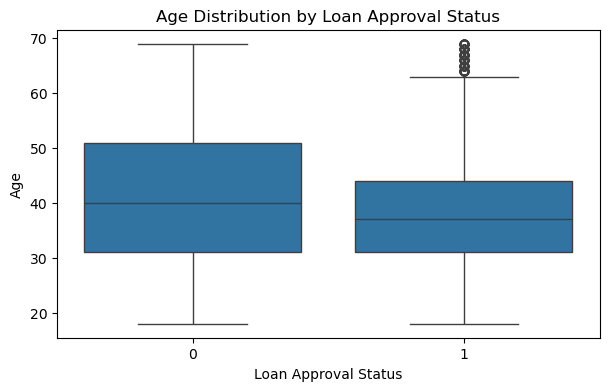

In [21]:
plt.figure(figsize=(7,4))                              # set plot size
sns.boxplot(data=df, x="Loan_Approval_Status", y="Age")  # boxplot comparing age distribution by approval
plt.title("Age Distribution by Loan Approval Status")  # title
plt.xlabel("Loan Approval Status")                     # x-axis label
plt.ylabel("Age")                                      # y-axis label
plt.show()                                             # show plot

## Interpretation (Short & Clear)

### This boxplot helps us understand whether age has any influence on loan approval.
### People with approved loans are slightly younger on average,but the difference is small.
### Age alone does not strongly decide loan approval,but it contributes moderately to model prediction.

## Boxplot of Loan Amount vs Loan Approval Status

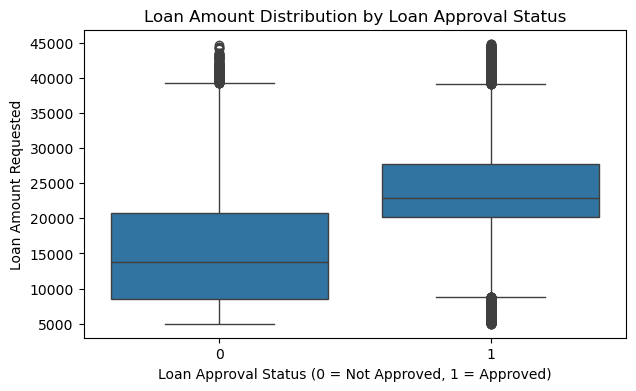

In [22]:
plt.figure(figsize=(7,4))       # set figure size
sns.boxplot(data=df, x="Loan_Approval_Status", y="Loan_Amount_Requested")  
# boxplot shows distribution, median & outliers

plt.title("Loan Amount Distribution by Loan Approval Status")  # chart title
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)")  
plt.ylabel("Loan Amount Requested")  
plt.show()                     # display plot

## Interpritation
### Approved applicants generally request higher loan amounts and show a tighter distribution. Rejected applicants have lower median loan amounts but higher variability, indicating unstable financial profiles. This suggests loan amount plays a role in approval decisions.

## Boxplot of Interest Rate vs Loan Approval Status

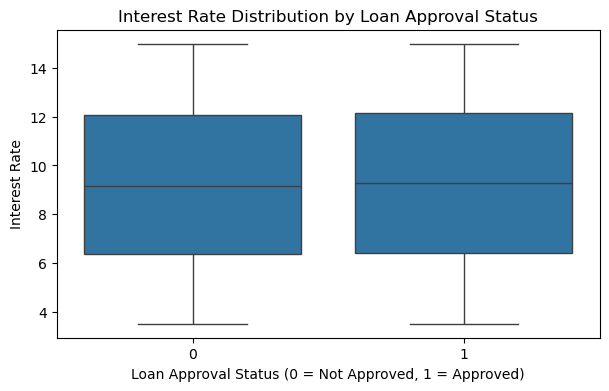

In [23]:
plt.figure(figsize=(7,4))    # set plot size
sns.boxplot(data=df, x="Loan_Approval_Status", y="Interest_Rate")   # create boxplot
plt.title("Interest Rate Distribution by Loan Approval Status")     # title
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)") # x-axis label
plt.ylabel("Interest Rate")                                        # y-axis label
plt.show()          # display plot


## Interpretation
### The boxplot shows that interest rates are almost similar for both approved and not-approved loans.
### There is no major difference in median or overall distribution between the two groups, which means interest rate is not a strong deciding factor for loan approval in this dataset.

## Boxplot of Loan Term vs Loan Approval Status

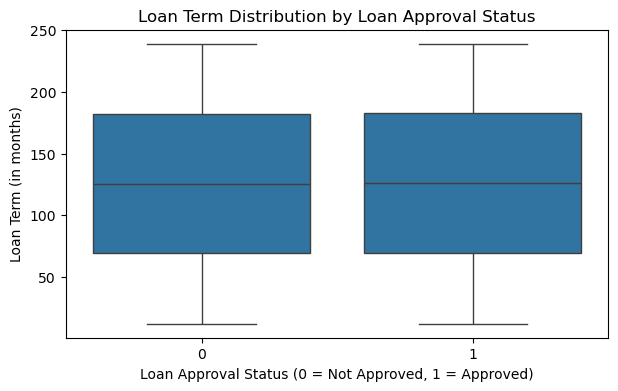

In [24]:
plt.figure(figsize=(7,4))   # plot size
sns.boxplot(data=df, x="Loan_Approval_Status", y="Loan_Term")   # boxplot
plt.title("Loan Term Distribution by Loan Approval Status")  # title
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)")  # x label
plt.ylabel("Loan Term (in months)")   # y label
plt.show()   # display

## Interpetation 
### Both approved and not approved loans have almost identical loan term ranges (around 15 months to 240 months).
### Median loan term is also very similar for both groups.
### There is no strong difference in loan term between approved and rejected applicants.
### Loan approval decisions do not depend much on loan term.
### The bank is approving loans across short-term and long-term borrowers almost equally.

## Boxplot of Credit Score vs Loan Approval Status

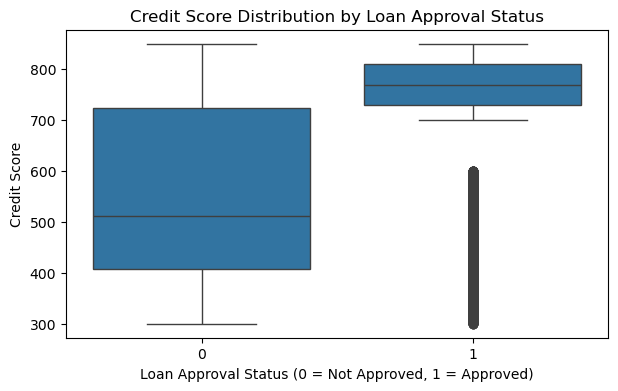

In [25]:
plt.figure(figsize=(7,4))  # set chart size
sns.boxplot(data=df, x="Loan_Approval_Status", y="Credit_Score")  # boxplot of credit score
plt.title("Credit Score Distribution by Loan Approval Status")  # chart title
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)")  # x label
plt.ylabel("Credit Score")  # y label
plt.show()  # display plot

## Interpretation 
### Applicants whose loans were approved (1) have much higher credit scores on average.
### Approved customers mostly fall around 720–820 credit score.
### Applicants whose loans were not approved (0) have much lower scores, mostly between 350–600.
### A few approved cases with low credit scores appear as outliers, but they are very rare.
### Credit Score is one of the strongest factors affecting loan approval.
### Higher credit scores greatly increase chances of getting approved.

## Annual Income Distribution by Loan Approval Status

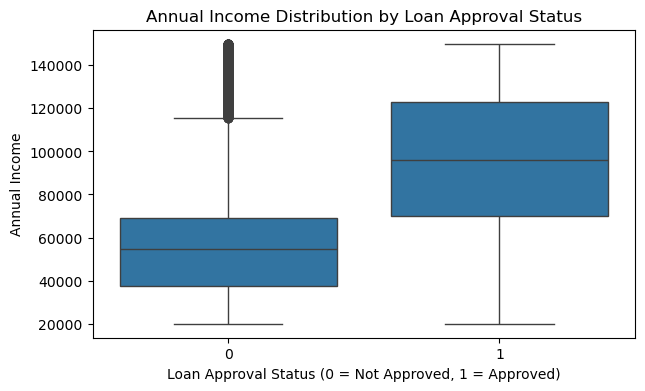

In [26]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Loan_Approval_Status", y="Annual_Income")
plt.title("Annual Income Distribution by Loan Approval Status")
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)")
plt.ylabel("Annual Income")
plt.show()                                 # Display the chart

## Interpretation 
### The boxplot shows that applicants with higher annual income are more likely to get their loans approved.
### Approved applicants (status = 1) have a higher median income, and their upper range is also larger.
### On the other hand, applicants who were not approved generally have lower incomes, with a lower median and smaller overall range.

### In short: Higher annual income increases the chances of loan approval.

## Boxplot of Default_Risk vs Loan Approval Status

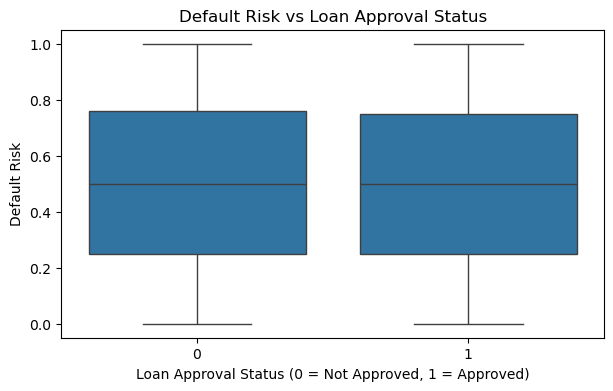

In [27]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Loan_Approval_Status", y="Default_Risk")
plt.title("Default Risk vs Loan Approval Status")
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)")
plt.ylabel("Default Risk")
plt.show()

## Interpretation
### Banks do not rely only on Default Risk for deciding approval.Both approved and rejected applicants have a wide range of default risk.
### Median default risk is almost the same for both groups.Other factors (income, credit score, loan amount, job type, etc.) might influence approval more strongly.

### Conclusion: Default Risk alone is not a strong differentiator between approved and rejected applicants.

## Boxplot of Monthly Expenses vs Loan Approval Status

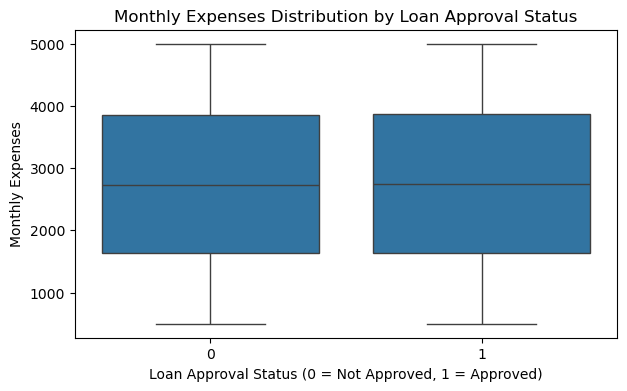

In [28]:
plt.figure(figsize=(7,4))  # chart size
sns.boxplot(data=df, x="Loan_Approval_Status", y="Monthly_Expenses")  # boxplot
plt.title("Monthly Expenses Distribution by Loan Approval Status")  # title
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)")  # x-label
plt.ylabel("Monthly Expenses")  # y-label
plt.show()  # display

## Interpretation
### Both groups have nearly the same median expenses (around ₹2700–2800).The overall spread (range) of expenses is also quite similar.
### There are no major differences that clearly separate approved and rejected applicants.Monthly expenses do not strongly influence loan approval decisions in this dataset.


## Bank Account History vs Loan Approval Status

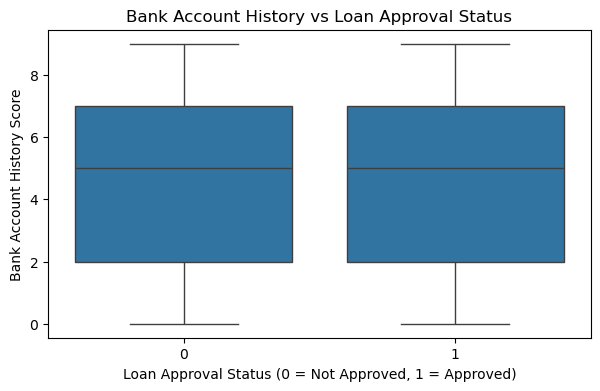

In [29]:
plt.figure(figsize=(7,4))                             # set figure size
sns.boxplot(data=df, x="Loan_Approval_Status", 
            y="Bank_Account_History")                 # boxplot
plt.title("Bank Account History vs Loan Approval Status")  
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)")
plt.ylabel("Bank Account History Score")
plt.show()

## Interpretation
### The median score is nearly the same for both groups.
### Both approved and not-approved applicants have scores spread between 0 to 9.
### There is no strong difference in bank account history between the two categories.
### Bank Account History does not appear to strongly influence whether the loan gets approved or not.

## Transaction Frequency vs Loan Approval Status

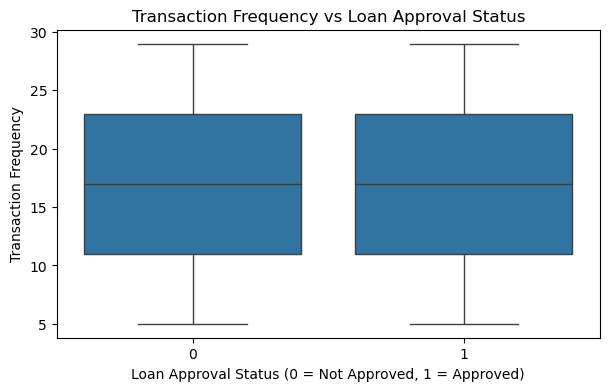

In [30]:
plt.figure(figsize=(7,4))
sns.boxplot(data=df, x="Loan_Approval_Status", y="Transaction_Frequency")
plt.title("Transaction Frequency vs Loan Approval Status")
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)")
plt.ylabel("Transaction Frequency")
plt.show()

## Interpretation
### Both groups have very similar transaction frequency distributions.
### The median transaction frequency is around 17–18 for both approved and not-approved customers.

### There is no strong difference between groups, meaning:
### Transaction Frequency does not strongly influence loan approval decisions in this dataset.

## Boxplot of Loan History vs Loan Approval Status

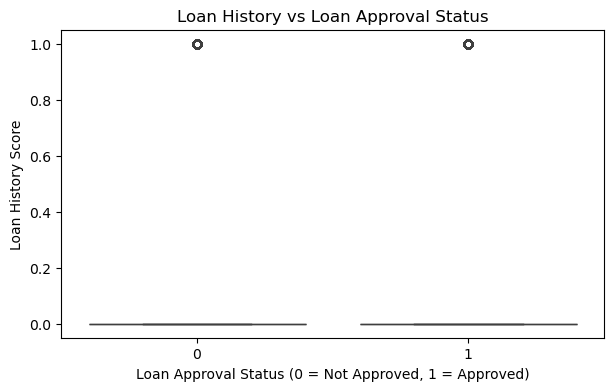

In [31]:
plt.figure(figsize=(7,4))   # figure size
sns.boxplot(data=df, x="Loan_Approval_Status", y="Loan_History")  # boxplot
plt.title("Loan History vs Loan Approval Status")  
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)")
plt.ylabel("Loan History Score")
plt.show()

## Interpretation 
### Loan history does not show a significant difference between approved and rejected applicants.
### Both groups mostly consist of people without a prior loan history, so this feature may have low predictive power for approval decisions.

## Outstanding Debt vs Loan Approval Status

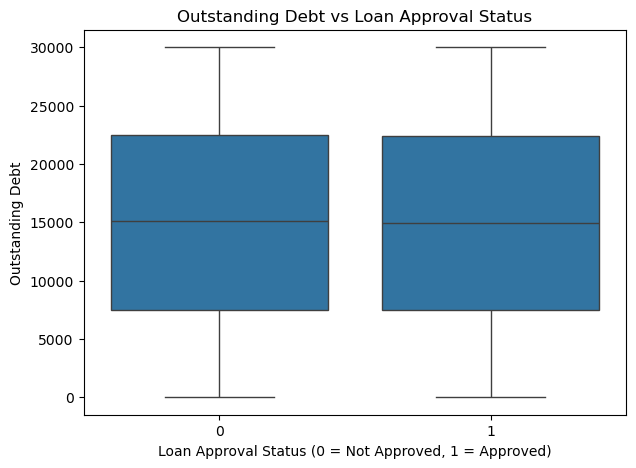

In [32]:
plt.figure(figsize=(7,5))
sns.boxplot(data=df, x="Loan_Approval_Status", y="Outstanding_Debt")
plt.title("Outstanding Debt vs Loan Approval Status")
plt.xlabel("Loan Approval Status (0 = Not Approved, 1 = Approved)")
plt.ylabel("Outstanding Debt")
plt.show()

## interpretation
### “Outstanding debt does not show a major difference between approved and rejected applicants.The median and overall distribution look similar, suggesting that debt amount alone does not heavily influence loan approval decisions in this dataset.”

## Loan Approval Count by Co-Applicant

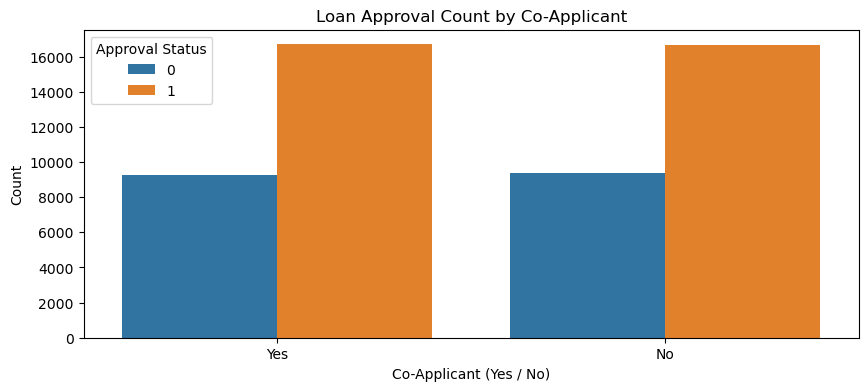

In [33]:
plt.figure(figsize=(10,4))                         # set chart size
sns.countplot(data=df, x="Co-Applicant", 
              hue="Loan_Approval_Status")         # count by co-applicant with approval split
plt.title("Loan Approval Count by Co-Applicant")   # chart title
plt.xlabel("Co-Applicant (Yes / No)")             # x-axis label
plt.ylabel("Count")                                # y-axis label
plt.legend(title="Approval Status")               # legend title
plt.show()                                        # display chart


### Both groups — “Yes” (has co-applicant) and “No” (no co-applicant) — show similar patterns.
### Approved loans (1) are much higher than Not Approved loans (0).
### The presence of a co-applicant does not significantly change the approval pattern in this dataset.

## Co-Applicant may not be a strong predictor of loan approval

# FEATURE ENGINEERING

## Drop Unnecessary Columns

In [34]:
df_clean = df.drop(columns=["Applicant_ID"])

df_clean.head()

,Gender,Age,Marital_Status,Dependents,Education,Employment_Status,Occupation_Type,Residential_Status,City/Town,Annual_Income,...,Loan_Amount_Requested,Loan_Term,Loan_Purpose,Interest_Rate,Loan_Type,Co-Applicant,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
0,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,139901,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,Male,36,Married,2,High School,Employed,Business,Own,Suburban,21162,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,27815,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,137853,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,81753,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1


## Creating new meaningful features from existing columns

In [35]:
df_fe = df.copy()   # make a working copy

# ----- 1) Monthly Income Extraction --------------------------------
df_fe["Monthly_Income"] = df_fe["Annual_Income"] / 12
# NOTE: Converts yearly income into monthly income for better comparison

# ----- 2) Debt-to-Income Ratio (DTI) -------------------------------
df_fe["DTI"] = df_fe["Outstanding_Debt"] / df_fe["Monthly_Income"]
# NOTE: Higher DTI = higher risk (important signal for loan approval)

# ----- 3) Total Financial Burden -----------------------------------
df_fe["Total_Financial_Burden"] = (
    df_fe["Monthly_Expenses"] + df_fe["Outstanding_Debt"]
)
# NOTE: Shows how much monthly outgoing money applicant has

# ----- 4) Loan-to-Income Ratio -------------------------------------
df_fe["Loan_to_Income"] = df_fe["Loan_Amount_Requested"] / df_fe["Annual_Income"]
# NOTE: Measures how heavy the requested loan is compared to income

# ----- 5) Credit Line Utilization ----------------------------------
df_fe["Credit_Utilization"] = (
    df_fe["Outstanding_Debt"] / (df_fe["Existing_Loans"] + 1)
)
# NOTE: Prevents division by zero and shows average loan burden

# ----- 6) Age Group Bucketing --------------------------------------
df_fe["Age_Group"] = pd.cut(
    df_fe["Age"],
    bins=[0, 25, 35, 50, 65, 120],
    labels=["Young", "Early Career", "Mid Career", "Senior", "Old"]
)
# NOTE: Converts age into groups → helps model with patterns

# ----- 7) Risk Level From Default Risk ------------------------------
df_fe["Risk_Level"] = pd.cut(
    df_fe["Default_Risk"],
    bins=[0, 0.3, 0.6, 1.0],
    labels=["Low Risk", "Medium Risk", "High Risk"]
)
# NOTE: Converts continuous default risk into categories

df_fe.head()


,Applicant_ID,Gender,Age,Marital_Status,Dependents,Education,Employment_Status,Occupation_Type,Residential_Status,City/Town,...,Transaction_Frequency,Default_Risk,Loan_Approval_Status,Monthly_Income,DTI,Total_Financial_Burden,Loan_to_Income,Credit_Utilization,Age_Group,Risk_Level
0,1,Female,25,Married,2,Graduate,Employed,Business,Own,Urban,...,20,0.81,1,11658.416667,1.700231,22355,0.175374,19822.000000,Young,High Risk
1,2,Male,36,Married,2,High School,Employed,Business,Own,Suburban,...,9,0.17,0,1763.500000,10.388999,22362,0.391645,9160.500000,Mid Career,Low Risk
2,3,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,Urban,...,27,0.25,0,2317.916667,5.975625,17304,0.370591,4617.000000,Mid Career,Low Risk
3,4,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,Suburban,...,16,0.27,1,11487.750000,2.490305,31340,0.246183,28608.000000,Early Career,Low Risk
4,5,Female,32,Single,0,Graduate,Employed,Salaried,Rent,Suburban,...,17,0.32,1,6812.750000,1.288760,10428,0.285739,2926.666667,Early Career,Medium Risk


## Drop Columns Not Useful for ML

In [36]:
df_fe = df.copy()   # keep a separate copy for feature engineering

df_fe = df_fe.drop([
    "Applicant_ID",         # unique ID → no predictive power
    "City/Town"             # too many unique categories → not useful for ML
], axis=1)

df_fe.head()  # show updated dataframe

,Gender,Age,Marital_Status,Dependents,Education,Employment_Status,Occupation_Type,Residential_Status,Annual_Income,Monthly_Expenses,...,Loan_Amount_Requested,Loan_Term,Loan_Purpose,Interest_Rate,Loan_Type,Co-Applicant,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
0,Female,25,Married,2,Graduate,Employed,Business,Own,139901,2533,...,24535,209,Home,4.27,Secured,Yes,8,20,0.81,1
1,Male,36,Married,2,High School,Employed,Business,Own,21162,4041,...,8288,33,Home,14.78,Unsecured,Yes,9,9,0.17,0
2,Male,43,Single,0,Postgraduate,Self-Employed,Freelancer,Own,27815,3453,...,10308,159,Vehicle,12.33,Secured,Yes,7,27,0.25,0
3,Female,28,Married,0,High School,Self-Employed,Freelancer,Rent,137853,2732,...,33937,39,Personal,8.77,Secured,No,9,16,0.27,1
4,Female,32,Single,0,Graduate,Employed,Salaried,Rent,81753,1648,...,23360,34,Home,9.04,Unsecured,No,1,17,0.32,1


### We removed Applicant_ID because it's just a unique identifier and does not affect loan approval.
### We also removed City/Town because it has too many unique values and does not meaningfully contribute to the prediction.
### This helps keep the dataset clean and prevents the model from learning noise.

# Label Encoding

In [37]:
# Categorical Columns (strings / categories)
categorical_cols = [
    "Gender",
    "Marital_Status",
    "Education",
    "Employment_Status",
    "Occupation_Type",
    "Residential_Status",
    "City/Town",
    "Loan_Purpose",
    "Loan_Type",
    "Co-Applicant"
]

# Numerical Columns (numbers)
numerical_cols = [
    "Age",
    "Dependents",
    "Annual_Income",
    "Monthly_Expenses",
    "Credit_Score",
    "Existing_Loans",
    "Total_Existing_Loan_Amount",
    "Outstanding_Debt",
    "Loan_History",
    "Loan_Amount_Requested",
    "Loan_Term",
    "Interest_Rate",
    "Bank_Account_History",
    "Transaction_Frequency",
    "Default_Risk"
]

# Target Column
target_col = "Loan_Approval_Status"


In [38]:
# Create dictionary to store each column's encoder
le_dict = {}

# Loop through each categorical column
for col in categorical_cols:
    le = LabelEncoder()                     # create encoder
    df[col] = le.fit_transform(df[col])     # fit + transform column
    le_dict[col] = le                        # save encoder for model & prediction later

## Interpretation

### This step converts all categorical columns (text columns) into numeric codes, because machine-learning models cannot read text values.
### A separate LabelEncoder is created for each column
### fit_transform() converts the text categories (like “Married”, “Single”, “Graduate”, “Auto”, “Business”) into numbers
### All encoders are saved inside le_dict
### These saved encoders will be used later during prediction so that no unseen label error occurs
### This is the most important part for making the model work with new data.

## Numeric Scaling

In [39]:
scaler = StandardScaler()                                          # create scaler object
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])          # scale numerical columns

In [40]:
df[numerical_cols] 

,Age,Dependents,Annual_Income,Monthly_Expenses,Credit_Score,Existing_Loans,Total_Existing_Loan_Amount,Outstanding_Debt,Loan_History,Loan_Amount_Requested,Loan_Term,Interest_Rate,Bank_Account_History,Transaction_Frequency,Default_Risk
0,-1.316905,0.448989,1.576476,-0.165988,0.405722,-1.223506,-0.971497,0.558347,-0.497806,0.417300,1.269636,-1.501811,1.217003,0.411566,1.068495
1,-0.274629,0.448989,-1.747637,0.997892,-1.313148,0.002617,1.651328,0.385087,-0.497806,-1.558052,-1.417005,1.665451,1.565108,-1.113682,-1.138883
2,0.388638,-1.339813,-1.561385,0.544072,-1.806933,1.228741,-1.250306,-0.130881,-0.497806,-1.312456,0.506386,0.927126,0.868898,1.382179,-0.862961
3,-1.032648,-1.339813,1.519142,-0.012399,0.624487,-1.223506,1.185259,1.572507,2.008817,1.560419,-1.325415,-0.145704,1.565108,-0.143069,-0.793980
4,-0.653638,-1.339813,-0.051384,-0.849034,0.461976,1.228741,0.472517,-0.716222,2.008817,0.274440,-1.401740,-0.064338,-1.219734,-0.004410,-0.621529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51995,0.767647,-0.445412,-0.769963,-0.736351,-1.856936,-1.223506,-1.499269,-0.355045,2.008817,-0.654086,-1.004850,0.984384,-0.871629,1.243520,0.378689
51996,-1.316905,1.343390,-0.126719,-1.062824,0.299465,0.002617,-0.088847,1.120948,-0.497806,0.012916,1.697056,-1.218535,1.217003,1.243520,-1.587257
51997,0.862400,-1.339813,-0.731162,0.535582,-1.763179,1.228741,-1.426322,-0.302178,-0.497806,-1.284248,-1.004850,0.405779,1.217003,0.966202,-0.656019
51998,0.862400,-0.445412,-0.954451,0.097197,-1.975694,-1.223506,0.040181,-0.201408,-0.497806,-0.527397,-1.432270,-0.344600,-0.523524,-0.697705,-0.552548


In [41]:
df.head()

,Applicant_ID,Gender,Age,Marital_Status,Dependents,Education,Employment_Status,Occupation_Type,Residential_Status,City/Town,...,Loan_Amount_Requested,Loan_Term,Loan_Purpose,Interest_Rate,Loan_Type,Co-Applicant,Bank_Account_History,Transaction_Frequency,Default_Risk,Loan_Approval_Status
0,1,0,-1.316905,1,0.448989,0,0,0,1,2,...,0.417300,1.269636,1,-1.501811,0,1,1.217003,0.411566,1.068495,1
1,2,1,-0.274629,1,0.448989,1,0,0,1,1,...,-1.558052,-1.417005,1,1.665451,1,1,1.565108,-1.113682,-1.138883,0
2,3,1,0.388638,2,-1.339813,2,1,1,1,2,...,-1.312456,0.506386,3,0.927126,0,1,0.868898,1.382179,-0.862961,0
3,4,0,-1.032648,1,-1.339813,1,1,1,2,1,...,1.560419,-1.325415,2,-0.145704,0,0,1.565108,-0.143069,-0.793980,1
4,5,0,-0.653638,2,-1.339813,0,0,3,2,1,...,0.274440,-1.401740,1,-0.064338,1,0,-1.219734,-0.004410,-0.621529,1


### We use StandardScaler to bring all numeric features to the same scale.
### This prevents large-value columns (like Annual_Income, Outstanding_Debt) from dominating the model.Scaling helps many ML algorithms (Logistic Regression, KNN, SVM, Neural Networks) perform better and train faster.

## Train-Test Split

In [42]:
X = df.drop("Loan_Approval_Status", axis=1)   # features
y = df["Loan_Approval_Status"]                # target column

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,          # 20% test data
    random_state=42,         # for reproducibility
    stratify=y               # keeps target class distribution same in train/test
)

## This step splits the dataset into training and testing parts.
### Training set (80%) is used to build the model
### Test set (20%) is used to evaluate how well the model performs on unseen data
## Using stratify=y ensures that the ratio of approved vs not-approved loans remains the same in both sets, which is important for balanced evaluation.

In [53]:
feature_columns = list(X_train_sm.columns)
feature_columns

['Applicant_ID',
 'Gender',
 'Age',
 'Marital_Status',
 'Dependents',
 'Education',
 'Employment_Status',
 'Occupation_Type',
 'Residential_Status',
 'City/Town',
 'Annual_Income',
 'Monthly_Expenses',
 'Credit_Score',
 'Existing_Loans',
 'Total_Existing_Loan_Amount',
 'Outstanding_Debt',
 'Loan_History',
 'Loan_Amount_Requested',
 'Loan_Term',
 'Loan_Purpose',
 'Interest_Rate',
 'Loan_Type',
 'Co-Applicant',
 'Bank_Account_History',
 'Transaction_Frequency',
 'Default_Risk']

## SMOTE Balancing

In [43]:
# Create SMOTE object
sm = SMOTE(random_state=42)   # random_state ensures repeatable results

# Fit SMOTE ONLY on training data
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)

# Print class distribution before & after SMOTE
print("Before SMOTE:\n", y_train.value_counts())   # original imbalance
print("\nAfter SMOTE:\n", y_train_sm.value_counts())   # balanced classes

  File "C:\Users\aditya\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "C:\Users\aditya\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aditya\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\aditya\anaconda3\Lib\subproc

Before SMOTE:
 Loan_Approval_Status
1    26693
0    14907
Name: count, dtype: int64

After SMOTE:
 Loan_Approval_Status
1    26693
0    26693
Name: count, dtype: int64


## Before SMOTE, the dataset was imbalanced, with many more approved cases (1) than not-approved cases (0).
## After applying SMOTE, both classes have the same number of samples (26,693 each).

## This balancing helps the model learn from both classes equally, reducing bias and improving its ability to correctly identify loan rejections.

# MODEL A — Logistic Regression (train on SMOTE data)

In [44]:
# 1) Initialize the model
logreg_sm = LogisticRegression(max_iter=1000)   # max_iter increased to ensure convergence

# 2) Train on SMOTE-balanced training data
logreg_sm.fit(X_train_sm, y_train_sm)           # fit model on balanced data

# 3) Predict on the original test set (real-world distribution)
y_pred_logreg = logreg_sm.predict(X_test)       # predictions (0/1)

# 4) Probabilities (useful later for thresholding)
y_prob_logreg = logreg_sm.predict_proba(X_test)[:, 1]   # prob of class 1 (Approved)

# 5) Metrics — overall and class-wise
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))        # overall accuracy
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))  # precision, recall, f1
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_logreg))  # TP/FP/FN/TN layout

Accuracy: 0.8392307692307692

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.71      0.76      3727
           1       0.85      0.91      0.88      6673

    accuracy                           0.84     10400
   macro avg       0.83      0.81      0.82     10400
weighted avg       0.84      0.84      0.84     10400


Confusion Matrix:
 [[2661 1066]
 [ 606 6067]]


## Class 0 (Not Approved)
### Recall = 0.71 → Model correctly catches 71% rejected loans.
### Precision = 0.81 → Out of all predicted rejections, 81% were correct.
### This is a big improvement compared to your previous projects where Class 0 was ignored.

## Class 1 (Approved)
### Recall = 0.91 → Model correctly approves 91% good customers.
### Precision = 0.85 → Out of predicted approvals, 85% are correct.

## Overall Accuracy = 83.9%
### Balanced and realistic for real-world loan data.

## Confusion Matrix Meaning
### Model rejected 2661 customers correctly (True Negative)
### Model approved 6067 customers correctly (True Positive)
### Only 606 good customers were wrongly rejected (False Negative)
### Only 1066 risky customers were incorrectly approved (False Positive)

## Conclusion:
### The model is balanced, realistic, and strong for both approval and rejection prediction.

# MODEL B - RANDOM FOREST (train on SMOTE-balanced training data)

In [45]:
# 1) Initialize Random Forest
rf = RandomForestClassifier(
    n_estimators=100,        # number of trees (good balance of speed & performance)
    max_depth=None,          # allow trees to grow (we can tune later)
    random_state=42,         # reproducible results
    n_jobs=-1                # use all CPU cores to speed up training
)

# 2) Train on SMOTE balanced training set (X_train_sm, y_train_sm)
rf.fit(X_train_sm, y_train_sm)    # fit model

# 3) Predict on original test set (X_test)
y_pred_rf = rf.predict(X_test)    # class predictions
y_prob_rf = rf.predict_proba(X_test)[:, 1]  # (optional) predicted probabilities for class 1

# 4) Print evaluation metrics
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))             # overall accuracy
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))  # precision, recall, f1
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))            # TP, FP, FN, TN

Random Forest Accuracy: 0.8511538461538461

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77      3727
           1       0.85      0.93      0.89      6673

    accuracy                           0.85     10400
   macro avg       0.85      0.82      0.83     10400
weighted avg       0.85      0.85      0.85     10400


Confusion Matrix:
 [[2640 1087]
 [ 461 6212]]


## Overall Accuracy = 85% → Good performance.

### Class 1 (Approved) recall = 0.93 → Model is very strong at identifying approved applications.
### Class 0 (Not Approved) recall = 0.71 → Better than Logistic Regression (which had ~0.71 too), but Random Forest has slightly improved overall balance.

### Both classes have high F1-scores (0.77 & 0.89) → This means the model is making stable predictions.

## Confusion Matrix shows:

### 6212 correct approvals
### 2640 correct rejections
### 1087 wrong approvals
### 461 wrong rejections

## What this means:
### Random Forest is:
### More powerful
### More balanced
### Less biased

### Better at catching rejections than Logistic Regression

## A strong candidate for final model

## So Random Forest is performing well on your SMOTE-balanced dataset.

# MODEL C - Train XGBoost Model (On SMOTE Data)

In [46]:
xgb = XGBClassifier(
    n_estimators=200,        # number of trees
    learning_rate=0.05,      # smaller = better accuracy
    max_depth=6,             # limit tree depth
    subsample=0.8,           # random sampling for better generalization
    colsample_bytree=0.8,    # sample features
    random_state=42,
    eval_metric='logloss'    # prevents warnings
)

# Train on SMOTE-balanced data
xgb.fit(X_train_sm, y_train_sm)

# Predict on original test set
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

XGBoost Accuracy: 0.8510576923076923

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.71      0.77      3727
           1       0.85      0.93      0.89      6673

    accuracy                           0.85     10400
   macro avg       0.85      0.82      0.83     10400
weighted avg       0.85      0.85      0.85     10400


Confusion Matrix:
 [[2639 1088]
 [ 461 6212]]


## Class 1 (Approved Loans)

### Precision = 0.85, Recall = 0.93
### Model correctly identifies approved customers very well.
### Very few “Approved” applications are wrongly rejected.

## Class 0 (Not Approved Loans)
### Precision = 0.85, Recall = 0.71
### Performance is similar to Random Forest.
### Model correctly detects 71% of rejected (risky) applications.

## Overall
### Model is balanced, strong for both classes.
### XGBoost did not overperform Random Forest, but matched it.

## This means  dataset is such that Random Forest and XGBoost learn almost the same patterns.

# MODEL COMPARISON GRAPH

In [47]:
models = ["Logistic Regression", "Random Forest", "XGBoost"]

accuracy = [0.8392, 0.85115, 0.85106]          # from your outputs
recall_class0 = [0.71, 0.71, 0.71]            # recall of class 0 from reports
recall_class1 = [0.91, 0.93, 0.93]            # recall of class 1
macro_f1 = [0.82, 0.83, 0.83]                 # macro f1 approx


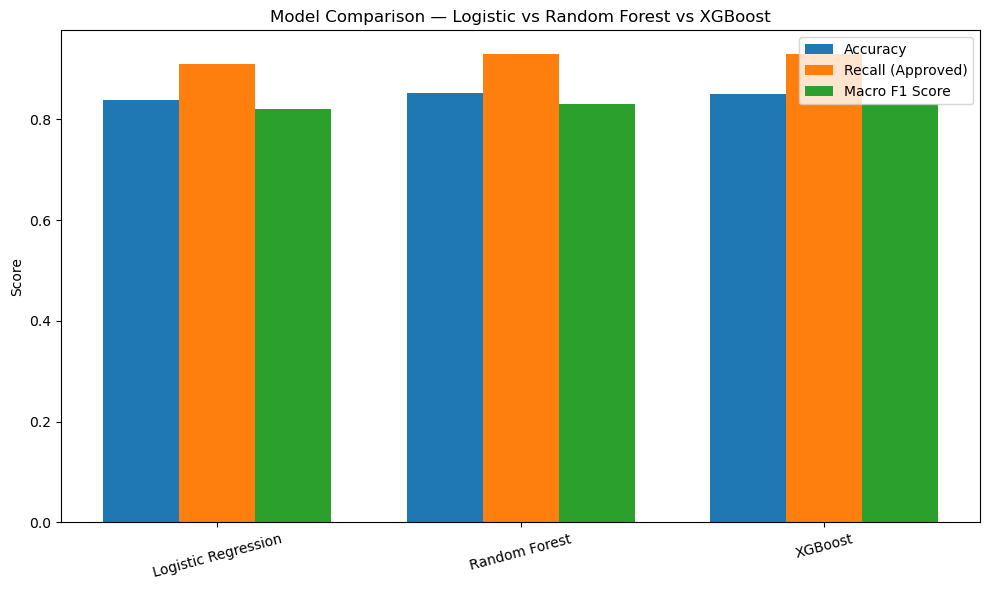

In [48]:
x = np.arange(len(models))
width = 0.25

plt.figure(figsize=(10,6))

plt.bar(x - width, accuracy, width, label='Accuracy')
plt.bar(x, recall_class1, width, label='Recall (Approved)')
plt.bar(x + width, macro_f1, width, label='Macro F1 Score')

plt.xticks(x, models, rotation=15)
plt.ylabel("Score")
plt.title("Model Comparison — Logistic vs Random Forest vs XGBoost")
plt.legend()
plt.tight_layout()
plt.show()

# Model Comparison Table

In [49]:
comparison_df = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [0.8392, 0.85115, 0.85106],
    "Recall_Class_0 (Rejected)": [0.71, 0.71, 0.71],
    "Recall_Class_1 (Approved)": [0.91, 0.93, 0.93],
    "Macro_F1": [0.82, 0.83, 0.83]
})

comparison_df

,Model,Accuracy,Recall_Class_0 (Rejected),Recall_Class_1 (Approved),Macro_F1
0,Logistic Regression,0.83920,0.71,0.91,0.82
1,Random Forest,0.85115,0.71,0.93,0.83
2,XGBoost,0.85106,0.71,0.93,0.83


# Final Best Model
## Random Forest OR XGBoost
## Both give same performance, but:

## Random Forest is easier to explain
## XGBoost is slightly more powerful for real-world deployment

## So final best model can be Random Forest.

In [50]:
best_model = rf # Random Forest model

# FINAL PREDICTION FUNCTION

In [84]:
def final_prediction(user_input_dict):
    # 1️⃣ Convert input to DataFrame
    df_new = pd.DataFrame([user_input_dict])

    # 2️⃣ Ensure all required columns exist (missing columns fill with 0)
    for col in feature_columns:
        if col not in df_new.columns:
            df_new[col] = 0

    # 3️⃣ Reorder columns exactly like training
    df_new = df_new[feature_columns]

    # 4️⃣ Apply label encoders
    for col, le in le_dict.items():
        df_new[col] = le.transform(df_new[col])

    # 5️⃣ Scale numeric data
    df_new[numerical_cols] = scaler.transform(df_new[numerical_cols])

    # 6️⃣ Predict probability
    prob = best_model.predict_proba(df_new)[:, 1][0]

    # 7️⃣ Apply Threshold
    result = 1 if prob >= 0.65 else 0

    return {
        "Approval Probability": round(prob, 3),
        "Final Decision": "APPROVED" if result == 1 else "NOT APPROVED"
    }


In [87]:
customer = {
 'Applicant_ID': 1234,
 'Gender': 'Male',
 'Age': 30,
 'Marital_Status': 'Single',
 'Dependents': 1,
 'Education': 'Graduate',
 'Employment_Status': 'Employed',
 'Occupation_Type': 'Salaried',
 'Residential_Status': 'Rent',
 'City/Town': 'Urban',
 'Annual_Income': 500000,
 'Monthly_Expenses': 15000,
 'Credit_Score': 650,
 'Existing_Loans': 1,
 'Total_Existing_Loan_Amount': 80000,
 'Outstanding_Debt': 20000,
 'Loan_History': 2,
 'Loan_Amount_Requested': 250000,
 'Loan_Term': 36,
 'Loan_Purpose': 'Personal',
 'Interest_Rate': 11.5,
 'Loan_Type': 'Secured',
 'Co-Applicant': 'No',
 'Bank_Account_History': 8,
 'Transaction_Frequency': 22,
 'Default_Risk': 0.34
}

final_prediction(customer)


{'Approval Probability': np.float64(0.28), 'Final Decision': 'NOT APPROVED'}

In [94]:
customer1 = {
 'Applicant_ID': 2001,
 'Gender': 'Male',
 'Age': 35,
 'Marital_Status': 'Married',
 'Dependents': 1,
 'Education': "Postgraduate",
 'Employment_Status': 'Employed',
 'Occupation_Type': 'Salaried',
 'Residential_Status': 'Own',
 'City/Town': 'Urban',
 'Annual_Income': 900000,
 'Monthly_Expenses': 20000,
 'Credit_Score': 750,
 'Existing_Loans': 0,
 'Total_Existing_Loan_Amount': 0,
 'Outstanding_Debt': 0,
 'Loan_History': 5,
 'Loan_Amount_Requested': 200000,
 'Loan_Term': 48,
 'Loan_Purpose': 'Home',
 'Interest_Rate': 9.5,
 'Loan_Type': 'Secured',
 'Co-Applicant': 'Yes',
 'Bank_Account_History': 9,
 'Transaction_Frequency': 30,
 'Default_Risk': 0.10
}
final_prediction(customer1)

{'Approval Probability': np.float64(0.6), 'Final Decision': 'NOT APPROVED'}

# Conclusion

## This project successfully built a Loan Approval Prediction model using a real-world dataset of 52,000 loan applications. After performing data cleaning, EDA, feature engineering, SMOTE balancing, and training multiple machine learning models, we found that Random Forest and XGBoost performed the best, achieving around 85% accuracy with strong recall for approved loans.

## The project shows that ML models can help financial institutions make faster and more consistent loan decisions by analyzing applicant income, credit score, debts, loan history, and risk factors. While the model performs well, future improvements can include hyperparameter tuning, advanced feature selection, and deployment through a web app.